In [1]:
import numpy as np
import pandas as pd
myFrame = pd.read_csv(r"C:\Users\Ahmed\Downloads\titanic.csv")
print(myFrame.head(10))

   pclass  survived                                             name     sex  \
0     1.0       1.0                    Allen, Miss. Elisabeth Walton  female   
1     1.0       1.0                   Allison, Master. Hudson Trevor    male   
2     1.0       0.0                     Allison, Miss. Helen Loraine  female   
3     1.0       0.0             Allison, Mr. Hudson Joshua Creighton    male   
4     1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   
5     1.0       1.0                              Anderson, Mr. Harry    male   
6     1.0       1.0                Andrews, Miss. Kornelia Theodosia  female   
7     1.0       0.0                           Andrews, Mr. Thomas Jr    male   
8     1.0       1.0    Appleton, Mrs. Edward Dale (Charlotte Lamson)  female   
9     1.0       0.0                          Artagaveytia, Mr. Ramon    male   

       age  sibsp  parch    ticket      fare    cabin embarked boat   body  \
0  29.0000    0.0    0.0     24160  211.3

In [2]:
print(f"num of rows: {myFrame.shape[0]}")
print(f"num of columns: {myFrame.shape[1]}")
print(myFrame.info())
print((pd.DataFrame(myFrame)).columns)

num of rows: 1310
num of columns: 14
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB
None
Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype=

In [3]:
aboutSet = """
pclass: Passenger Class (1st, 2nd, or 3rd)
1.0: First Class
2.0: Second Class
3.0: Third Class

survived: Survival (0 = No, 1 = Yes)
0.0: Did not survive
1.0: Survived

name: Passenger's Name

sex: Passenger's Gender
male: Male
female: Female

age: Passenger's Age

sibsp: Number of Siblings/Spouses Aboard

parch: Number of Parents/Children Aboard

ticket: Ticket Number

fare: Passenger Fare

cabin: Cabin Number

embarked: Port of Embarkation
C: Cherbourg
Q: Queenstown
S: Southampton

boat: Lifeboat (if survived and known)

body: Body Identification Number (if did not survive)

home.dest: Home/Destination
"""
print(f"{aboutSet}")


pclass: Passenger Class (1st, 2nd, or 3rd)
1.0: First Class
2.0: Second Class
3.0: Third Class

survived: Survival (0 = No, 1 = Yes)
0.0: Did not survive
1.0: Survived

name: Passenger's Name

sex: Passenger's Gender
male: Male
female: Female

age: Passenger's Age

sibsp: Number of Siblings/Spouses Aboard

parch: Number of Parents/Children Aboard

ticket: Ticket Number

fare: Passenger Fare

cabin: Cabin Number

embarked: Port of Embarkation
C: Cherbourg
Q: Queenstown
S: Southampton

boat: Lifeboat (if survived and known)

body: Body Identification Number (if did not survive)

home.dest: Home/Destination



In [4]:
print(myFrame.isnull().sum())

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64


In [5]:
haveNoEffect = ["name", "ticket", "fare", "cabin", "embarked", "boat", "body", "home.dest"]
myFrame = myFrame.drop(haveNoEffect, axis = 1)
print(myFrame.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   float64
 1   survived  1309 non-null   float64
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   float64
 5   parch     1309 non-null   float64
dtypes: float64(5), object(1)
memory usage: 61.5+ KB
None


In [6]:
whyRem = '''Features with Potentially Zero Importance:
name: The passenger's name is unlikely to have a direct impact on survival.
cabin: While cabin location could theoretically affect survival, the cabin column has a lot of missing values, making it less useful for analysis.
embarked: The port of embarkation might not directly influence survival, as it's more likely related to where passengers boarded the ship rather than their chances of survival.
boat: This column indicates the lifeboat number for survivors, so it's irrelevant for predicting survival since it's only available for those who survived.
body: This column indicates the identification number of the body if the passenger did not survive, so it's irrelevant for predicting survival as well.
home.dest: While it provides information about the passenger's home or destination, it might not directly affect survival.'''
print(whyRem)

Features with Potentially Zero Importance:
name: The passenger's name is unlikely to have a direct impact on survival.
cabin: While cabin location could theoretically affect survival, the cabin column has a lot of missing values, making it less useful for analysis.
embarked: The port of embarkation might not directly influence survival, as it's more likely related to where passengers boarded the ship rather than their chances of survival.
boat: This column indicates the lifeboat number for survivors, so it's irrelevant for predicting survival since it's only available for those who survived.
body: This column indicates the identification number of the body if the passenger did not survive, so it's irrelevant for predicting survival as well.
home.dest: While it provides information about the passenger's home or destination, it might not directly affect survival.


In [7]:
toEncode = (myFrame.select_dtypes(include = "object")).columns # cuz select_dtypes returns dataframe and get_dummies wants list
myFrame = pd.get_dummies(myFrame, columns = toEncode, drop_first = True)
print(myFrame.head())

   pclass  survived      age  sibsp  parch  sex_male
0     1.0       1.0  29.0000    0.0    0.0         0
1     1.0       1.0   0.9167    1.0    2.0         1
2     1.0       0.0   2.0000    1.0    2.0         0
3     1.0       0.0  30.0000    1.0    2.0         1
4     1.0       0.0  25.0000    1.0    2.0         0


In [8]:
print(myFrame.isnull().sum())
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "mean")
myFrame = pd.DataFrame(imputer.fit_transform(myFrame), columns=myFrame.columns)# SimpleImputer returns a numpy array,
print(myFrame.isnull().sum())

pclass        1
survived      1
age         264
sibsp         1
parch         1
sex_male      0
dtype: int64
pclass      0
survived    0
age         0
sibsp       0
parch       0
sex_male    0
dtype: int64


In [9]:
print(myFrame.head())

   pclass  survived      age  sibsp  parch  sex_male
0     1.0       1.0  29.0000    0.0    0.0       0.0
1     1.0       1.0   0.9167    1.0    2.0       1.0
2     1.0       0.0   2.0000    1.0    2.0       0.0
3     1.0       0.0  30.0000    1.0    2.0       1.0
4     1.0       0.0  25.0000    1.0    2.0       0.0


<Axes: >

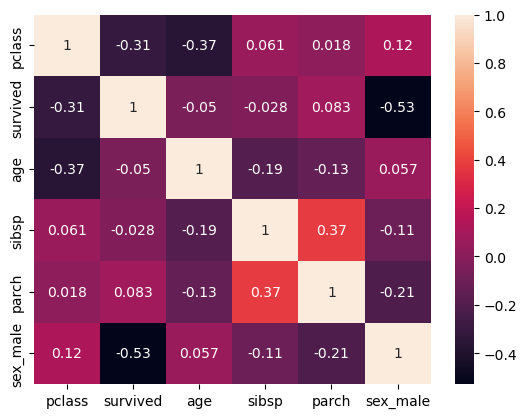

In [10]:
c = myFrame.corr()
import seaborn as sns
sns.heatmap(c, annot = True)

In [12]:
myFrame['survived'] = myFrame['survived'].astype(int) # in a logistic regression model, target shoult be discrete, "int"

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x = myFrame.drop(["survived"], axis = 1)
y = myFrame["survived"]

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 42)

model = LogisticRegression()
model.fit(xTrain, yTrain)

yPred = model.predict(xTest)

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluatePerformance(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")

In [15]:
evaluatePerformance(yTest, yPred)

Accuracy: 0.7824427480916031
Precision: 0.8160919540229885
Recall: 0.6339285714285714
F1-score: 0.7135678391959799


In [19]:
clarify = """
 Accuracy measures the overall correctness of the predictions.
Precision measures the proportion of true positive predictions among all positive predictions. In this case, it indicates how many of the predicted survivors actually survived.
Recall measures the proportion of true positive predictions among all actual positive instances. In this case, it indicates how many of the actual survivors were correctly identified by the model.
F1-score is the harmonic mean of precision and recall. It provides a balanced measure that considers both precision and recall.
"""
print(clarify)


 Accuracy measures the overall correctness of the predictions.
Precision measures the proportion of true positive predictions among all positive predictions. In this case, it indicates how many of the predicted survivors actually survived.
Recall measures the proportion of true positive predictions among all actual positive instances. In this case, it indicates how many of the actual survivors were correctly identified by the model.
F1-score is the harmonic mean of precision and recall. It provides a balanced measure that considers both precision and recall.



In [22]:
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
gradient_model = GradientBoostingClassifier()

gradient_model.fit(xTrain, yTrain)
gradient_predictions = gradient_model.predict(xTest)

voting_classifier = VotingClassifier(estimators=[('gradient', gradient_model), ('logistic', model)], voting='soft')
voting_classifier.fit(xTrain, yTrain)
ensemble_predictions = voting_classifier.predict(xTest)

evaluatePerformance(yTest, ensemble_predictions)

Accuracy: 0.7748091603053435
Precision: 0.8117647058823529
Recall: 0.6160714285714286
F1-score: 0.700507614213198


adjusting hyperparameters: 

In [30]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids for individual models
gradient_params = {'learning_rate': [0.1, 0.01], 'max_depth': [2, 6]}
logistic_params = {'C': [0.1, 1, 10]}

# Perform grid search for Gradient Boosting Classifier
gradient_grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid=gradient_params, cv=5)
gradient_grid_search.fit(xTrain, yTrain)
best_gradient_model = gradient_grid_search.best_estimator_

# Perform grid search for Logistic Regression
logistic_grid_search = GridSearchCV(LogisticRegression(), param_grid=logistic_params, cv=5)
logistic_grid_search.fit(xTrain, yTrain)
best_logistic_model = logistic_grid_search.best_estimator_

# Define Voting Classifier with optimized weights
optimized_voting_classifier = VotingClassifier(estimators=[('gradient', best_gradient_model), ('logistic', best_logistic_model)], voting='soft')
optimized_voting_classifier.fit(xTrain, yTrain)

# Evaluate performance of optimized Voting Classifier
ensemble_predictions = optimized_voting_classifier.predict(xTest)
evaluatePerformance(yTest, ensemble_predictions)

Accuracy: 0.7786259541984732
Precision: 0.8214285714285714
Recall: 0.6160714285714286
F1-score: 0.7040816326530611
